# Questions du Projet d'Algèbre

## Question 2
<p style="color:blue"> Montrer que si $M$ est une matrice stochastique, alors pour tout entier $t \geq 0$, $M^t$ est une matrice stochastique. ($M^0=I$, la matrice identité. Montrez ce résultat par récurrence, avec base $t=1$.)</p> 

On pose l'hypothèse $(P_{t}) : M^{t}$ est une matrice stochastique, avec $t>0$ 


Initialisation : Vérifions que l'hypothèse est vraie au rang 0. M est une matrice stochastique et on a bien $M^{t+1} = M^{t}M$  donc $(P_{0})$ est vraie. La propriété est donc vraie au rang 0.


Hérédité : Supposons que la propriété soit vraie au rang t, c'est-à-dire que $(P_{t})$ soit vraie, montrons alors que $(P_{t+1})$ est vraie, c'est à dire que $M^{t+1}$ est une matrice stochastique.


$M^{t+1} = M^{t}M$ 


On pose $M^{t}$ une matrice de la forme $[u_{i,j}]$ et M de la forme $[v_{i,j}]$ 

$M^{t}M=\begin{pmatrix}
   \sum\limits_{\substack{i=1}}^{n}u_{1,i}v_{i,1} & \sum\limits_{\substack{i=1}}^{n}u_{1,i}a_{i,2} & \ldots & \sum\limits_{\substack{i=1}}^{n}u_{1,i}v_{i,n}\\
   \sum\limits_{\substack{i=1}}^{n}u_{2,i}v_{i,1} & \sum\limits_{\substack{i=1}}^{n}u_{2,i}v_{i,2} & &  \\
   \vdots & & \ddots &  \\
   \sum\limits_{\substack{i=1}}^{n}u_{n,i}v_{i,1} & & & \sum\limits_{\substack{i=1}}^{n}u_{n,i}v_{i,n}
\end{pmatrix}$ 

On pose  S la somme des coefficients d'une ligne p de $M^{n}M$. 

$S = \sum\limits_{\substack{k=1}}^{n}\sum\limits_{\substack{i=1}}^{n} u_{p,i}v_{i,k} =\sum\limits_{\substack{i=1}}^{n}\sum\limits_{\substack{k=1}}^{n} u_{p,i}v_{i,k}=\sum\limits_{\substack{i=1}}^{n} u_{p,i}\sum\limits_{\substack{k=1}}^{n} v_{i,k}=\sum\limits_{\substack{i=1}}^{n} u_{p,i} \times 1=1$

De plus, comme $\forall (i,j) \in { [1,n]}^{2}, v_{i,j}>0$ et $u_{i,j}>0,
\forall (l,p) \in { [1,n]}^{2}, \sum\limits_{\substack{i=1}}^{n}u_{l,i}v_{i,p}>0$


**On a bien $M^{t+1}$ stochastique. Donc par récurrence la propriété $(P_t)$ est vraie pour tout $t>0$ . Donc $M^{t}$ est stochastique.**

## Question 3
<p style="color:blue">Un **vecteur de probabilité** ou **vecteur stochastique** est un vecteur ligne $\mathbf{v}^∗$
dont tous les coefficients sont non-négatifs et 
<br/>
$\hspace{12pt} \sum_i \mathbf{v}_i = 1.$
<br/>
Montrez que si $\mathbf{v}^∗$ est un vecteur de probabilité et $M$ une matrice stochastique alors $\mathbf{v}^∗M$ est un vecteur de probabilité.</p>


D'après le sujet, on sait que $v^*=[v_{i}]$ est un vecteur de probabilité et $M=[m_{i,j}]$ est une matrice stochastique.
On a donc: 

$v*M=\begin{pmatrix}
    \sum\limits_{\substack{i=1}}^{n}m_{i,1}v_{i}\\
    \sum\limits_{\substack{i=1}}^{n}m_{i,2}v_{i}\\
   \vdots \\
   \sum\limits_{\substack{i=1}}^{n}m_{i,n}v_{i}\\ 
\end{pmatrix}$ 


Or: $\sum\limits_{\substack{k=1}}^{n}\sum\limits_{\substack{i=1}}^{n}m_{i,k}v_{i}=\sum\limits_{\substack{i=1}}^{n}\sum\limits_{\substack{k=1}}^{n}m_{i,k}v_{i}=\sum\limits_{\substack{i=1}}^{n}v_{i}\sum\limits_{\substack{k=1}}^{n}m_{i,k}=\sum\limits_{\substack{i=1}}^{n}v_{i}\times 1=1$ 

(On sait que la somme d'un vecteur stochastique est égale à 1 d'où la simplification)

**Il en résulte que $v*M$ est un vecteur de probabilité.**

## Question 4
<p style="color:blue"> Montrez que $Ms$ est réelle et symétrique</p>

$M_s=D^{1/2}MD^{-1/2}$
$= D^{1/2}D^{-1}LD^{-1/2} = D^{-1/2}LD^{-1/2}$ 
(car d'après l'énonçé la matrice M normalisée s'écrit $M=D^{-1}L$)
On veut prouver que $M_s$ est une matrice symétrique. 
Notre objectif est de montrer que : 

$M_s = \;^tM_s$

$\;^{t}M_s= \;^t(D^{1/2}MD^{-1/2})= \;^t(MD^{-1/2})\;^tD^{1/2}$

$\;\;\;\;\;\;\;=D^{-1/2} \;^tMD^{1/2}=D^{-1/2} \;^tL\;^tD^{-1}D^{1/2}$

$\;\;\;\;\;\;\;=D^{-1/2}LD^{-1/2}=M_s$

**On a bien prouvé que $M_s = {}^tM_s$. Donc $Ms$ est symétrique.**

## Question 5

### 5.1

<p style="color:blue"> Montrer que $Ms$ possède des valeurs propres réelles. (Considérez l'adjoint de $Msx=\lambda x$ et montrez que $\overline{\lambda}=\lambda$.) </p>

Une matrice à éléments réels est hermitienne si et seulement si elle est symétrique. Ici $M_s$ est réelle et symétrique (question 4) donc elle est hermitienne.
Nous allons utiliser une démonstration du cours sur les matrices hermitiennes. 

Dire que $M_s$ possède des valeurs propres réelles revient à montrer que $\lambda = \;^t\lambda$.

On a : 

$M_sx = \lambda x$

En considérant l'adjoint, on peut écrire: 
$(M_sx)^* = (\lambda x)^*$ 

Or 
$(M_s x)^* = (\lambda x)^* = \;^t\lambda x^* $

Il en résulte que:

$x^* M_s = \;^t\lambda x^*  \Leftrightarrow$

$x^* M_sx = \;^t\lambda x^* x \Leftrightarrow$

$x^* \lambda x = \;^t \lambda \;(\text{car }M_sx=\lambda x) \Leftrightarrow$

$\lambda x^*x = \;^t\lambda$

Or $x^*x = 1$.
On a bien $\lambda = \;^t\lambda.$

$M_s$ possède bien des valeurs propres réelles.

### 5.2

<p style="color:blue"> Montrer que $Ms$ possède des vecteurs propres orthogonaux pour des valeurs propres distinctes. (Considérez $\lambda_1 \ne \lambda_2$ et $Msx_1=\lambda x_1$ et $Msx_2=\lambda_2x_2$, et montrez que $x^∗_1x_2$ doit être nul.)</p>

Dire que $ M_s$ possède des vecteurs propres orthogonaux revient à montrer que $x_1x_2 = 0\;\;$ en considérant 

$ M_sx_1 = \lambda_1x_1 $ et $ M_sx_2 = \lambda_2x_2 $ avec $\lambda_1 \ne \lambda_2$

On peut écrire : 

$ M_s\;^tx_2 = \lambda_2\;^tx_2$

On multiplie par $M_sx_1$ de chaques côtés, on obtient: 

$ M_s^2x_1\;^tx_2 = M_sx_1\lambda_2\;^tx_2 $ 

et $\;M_sx_1 = \lambda_1x_1$ donc 

$ M_s^2x_1\;^tx_2 = \lambda_1\lambda_2\;^tx_2x_1 $ 

Or : 

$ M_s^2x_1\;^tx_2 = \;^tx_2M_sM_sx_1 = \;^tx_2 \lambda_1^2 x_1 = \lambda_1^2x_1\;^tx_2$ 

On a l'égalité suivante: $ \lambda_1\lambda_2\;^tx_2x_1 = M_s^2x_1\;^tx_2 = \lambda_1^2x_1\;^tx_2 $

En sachant que $\lambda_1 \ne \lambda_2$, cette égalité est vérifiée uniquement si $x_1*x_2 = 0$.

$M_s$ possède bien des vecteurs propres orthogonaux pour des valeurs propres distinctes.

## Question 6

<p style="color:blue"> Montrez que les familles de vecteurs $\Psi$ et $\Phi^*$ sont bi-orthogonales.</p> 

On a : 

$\forall (i,j) \in {[1,n]}^{2}, $ avec $i \ne j, \phi_{i}^*\psi_{j}=\sqrt{D_{i,i}}v_{i}^* \cfrac{v_{j}}{\sqrt{D_{j,j}}}=0$ 

Cette relation est vraie car $v_{i}*\times v_{j}=0$. 

$v_i$ et $v_j$ sont des colonnes de la matrice V et les colonnes de V sont des familles orthogonales.

De plus:  $\phi_{i}^*\psi_{i}=\sqrt{D_{i,i}}v_{i}^* \cfrac{v_{i}}{\sqrt{D_{i,i}}}=v_i^*v_i = I = 1$

Donc les 2 familles de vecteurs $\Phi$ et $\Psi$ sont bien bi-orthogonales.

# Code Python pour le Projet d'Algèbre

## Chargement des bibliothèques

In [1]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import exp, sqrt

## Définition de la classe DataMatrix

Cette classe va comprendre les attributs et méthodes nécéssaires aux diverses questions du Projet.

Les arguments d'entrée sont $\epsilon$, le nom (ou le chemin) du fichier, $t$ et $k$.

- **$\epsilon$** : Paramètre du noyau gaussien (voir partie 8)
- *$t$* : Puissance appliquée à la valeur propre lors de la définition de la diffusion map (voir partie 7)
- *$k$* : Nombre de dimensions conservées par la diffusion map (voir partie 7)

Ex : 
```
my_data = DataMatrix(eps, "my_file.csv", k=k, t=t)```

### 1. Import des données et normalisation

L'import des données se fait par la lecture du fichier `.csv` fourni.<br/>
On normalise les données en effectuant 

$\cfrac{x_{ij} - j_{moy}}{j_{max}-j_{min}}$

Sur chaque $x_{ij}$, élément de nos données de nos données ; avec $i$ une ligne et $j$ une colonne.

### 2. Construction de la matrice $L$

Soient  $x, y$ deux éléments de notre tableau de données.<br/>
On renvoie le résultat de $k(x,y)$ pour tout élément de notre tableau, et construisons ainsi la matrice symétrique $L$
(car $k(x,y) = k(y,x)$).


### 3. Construction de la matrice $D$
$D$ est une matrice diagonnale telle que :

$D_{ii} = \sum_{j=1}L_{ij}$

et

$D_{ij} = 0 , i \neq j$

### 4. Construction de la matrice $Ms$

On construit $Ms$, matrice stochastique avec :

$Ms = D^{-1/2}LD^{-1/2}$

### 5. Construction de la matrice $M$
On construit $M$, semblable à $Ms$ avec :

$M = D^{-1/2}V\Lambda V^*.D^{1/2}$

### 6. Construction des familles vecteurs $\Phi$ et $\Psi$   
On construit ces familles de vecteurs selon les formules suivantes :

$\psi_j = \cfrac{v_j}{\sqrt{D_{j,j}}}$

$\phi_j^* = \sqrt{D_{j,j}} v_j^*.$


### 7. Définition de la diffusion map pour les $k$ premières valeurs propres

On définis la diffusion map avec :

$\Psi_t = \left(\lambda_1^t \psi_1, \lambda_2^t \psi_2,..., \lambda_k^t \psi_k \right)$

Nous avons avons ainsi réduit nos données en $k$ dimensions.

### 8. Définition de la fonction noyau de similarité $k(x,y)$
Cette fonction renvoie le noyau de similarité gaussien au paramètre $\epsilon$ défini:

${\Large e^{-\frac{||x-y||^2}{\epsilon}}}$


In [2]:
class DataMatrix:
  def __init__(self, eps, filename, k=2, t=5):
    
    self.eps = eps
    
#1. Import des données et normalisation   
#--------------
    self.data = pd.read_csv(filename, decimal=",", sep="\s+")

    #Stockage des en-têtes
    self.headers = list(self.data.columns.values)
    
    #Stockage des valeurs
    self.data = np.array(self.data.values)
    self.nb_el = len(self.data)

    
    for i, row  in enumerate(self.data[:,1:]) :
      for j, elt in enumerate(row):
        
        #Transformation des objets en float
        elt = float(elt)
        
        #Normalisation des données
        self.data[i,j+1] = (self.data[i,j+1] - self.data[:,j+1].mean())/(self.data[:,j+1].max()-self.data[:,j+1].min()) if self.data[:,j+1].max()-self.data[:,j+1].min() != 0 else 0 #(self.data[i,j] - self.data[:,j].mean())


#2. Construction de la matrice L
#--------------
    self.L = np.array([[0.0  for _ in range(self.nb_el)] for _ in range(self.nb_el)])

    for i in range(self.nb_el):
      for j in range(self.nb_el):
        if i >= j :
          self.L[i,j] = self.k(i,j)
          self.L[j,i] = self.L[i,j]

#3. Construction de la matrice D
#--------------
    self.D = np.array([[0.0  for _ in range(self.nb_el)] for _ in range(self.nb_el)])

    for i in range(self.nb_el):
      self.D[i,i] = self.L[i].sum()


#4. Construction de la matrice Ms avec Ms = D^-1/2 L D^-1/2
#--------------
    #Définition de D^-1/2 et D^1/2
    D_half = np.matrix(np.zeros(self.D.shape))
    D_mhalf = np.matrix(np.zeros(self.D.shape))

    np.fill_diagonal(D_half, 1/ (self.D.diagonal()**0.5))    # -> D^1/2
    np.fill_diagonal(D_mhalf, 1/ (self.D.diagonal()**-0.5))  # -> D^-1/2


    self.Ms = np.dot(D_mhalf,self.L).dot(D_mhalf)
    
    #Calcul des valeurs et vecteurs propres de Ms
    w,v = np.linalg.eig(self.Ms)
    le = len(v)
    
    #Tri des valeurs et vecteurs propres dans l'ordre décroissant
    sor = w.argsort()[::-1]
    v = v[sor]
    w = w[sor]
    
    self.Lambda = np.array([[0.0 for _ in range(le)] for _ in range(le)])
    for i in range(le):
      self.Lambda[i,i]=w[i]

    self.V = v

#5. Construction de la matrice M avec M = D^-1/2 .V.Lambda.V*.D^1/2
#--------------
    #commenté pour économiser du temps de calcul
    #self.M = np.dot(D_mhalf,self.V).dot(self.Lambda).dot(self.V.transpose()).dot(D_half)

#6. Construction des familles vecteurs Phi et Ksi   
#--------------
    self.Ksi = np.array([[0.0 for _ in range(self.nb_el)] for _ in range(self.nb_el)])
    self.Phi = np.array([[0.0 for _ in range(self.nb_el)] for _ in range(self.nb_el)])

    #Sauvegarde de v* pour économiser du temps de calcul
    Vt = self.V.transpose()

    for j in range(self.nb_el):
      self.Ksi[j] = self.V[j]/sqrt(self.D[j,j])
      self.Phi[j] = Vt[j]*sqrt(self.D[j,j])
        
    self.phi_dm = []
    
#7. Définition de la diffusion map pour les k premières valeurs propres
    for i in range(k):
      self.phi_dm.append(w[i+1]**t * self.Ksi[i+1])

    

#8. Définition de la fonction noyau de similarité
#--------------
    
  def k(self, i ,j):
    """Returns the gaussian similarity kernel between the elements at positions i and j"""
    x = self.data[i,1:]
    y = self.data[j,1:]
    return exp(-((np.linalg.norm(x-y))**2)/self.eps)

## Application du code

On teste ici pour $\epsilon = 2$, $k = 3$ et $t = 10$

In [3]:
#Test effectué avec un dataset réduit
datatest = DataMatrix(1,"data_small.csv", k=3, t=5)
print "\nL :\n", datatest.L
print "\nD :\n", datatest.D


L :
[[  1.00000000e+00   3.76165032e-05   8.29022143e-06 ...,   8.48366332e-12
    7.58932016e-22   1.24176735e-17]
 [  3.76165032e-05   1.00000000e+00   2.08239122e-01 ...,   1.92439161e-07
    4.87408031e-13   3.61458993e-11]
 [  8.29022143e-06   2.08239122e-01   1.00000000e+00 ...,   2.13462958e-07
    1.91280292e-11   5.55275401e-10]
 ..., 
 [  8.48366332e-12   1.92439161e-07   2.13462958e-07 ...,   1.00000000e+00
    2.09720330e-10   3.17780147e-05]
 [  7.58932016e-22   4.87408031e-13   1.91280292e-11 ...,   2.09720330e-10
    1.00000000e+00   2.49876726e-07]
 [  1.24176735e-17   3.61458993e-11   5.55275401e-10 ...,   3.17780147e-05
    2.49876726e-07   1.00000000e+00]]

D :
[[ 1.85802821  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          2.20139026  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          1.86849013 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  1.08260447  0.     

## Question 8 
On génère le(s) graphique(s) de la difusion map.

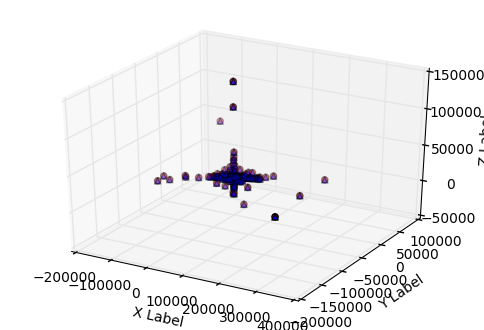

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m in [('r', 'o'), ('b', '^')]:
  xs = datatest.phi_dm[0]
  ys = datatest.phi_dm[1]
  zs = datatest.phi_dm[2]
  ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Simulations sur le dataset

Pour $\epsilon=-10$ et $t=10$ :

<img src="img_notebook/epsi_-10_t_10v2.png">

Pour $\epsilon=0.01$ et $t=10$ :

<img src="img_notebook/epsi_001_t_10v2.png">

Pour $\epsilon=1$ et $t=10$ :

<img src="img_notebook/epsi_1_t_10v2.png">

Pour $\epsilon=1$ et $t=100$ :

<img src="img_notebook/epsi_1_t_100v2.png">

Pour $\epsilon=10$ et $t=10$ :

<img src="img_notebook/epsi_10_t_10v2.png">

Pour $\epsilon=1$ et $t=1$ :

<img src="img_notebook/epsi_1_t_1v2.png">

On remarque qu'$\epsilon$ joue sur la dispersion des point autours du point central. Le paramètre $t$, quand à lui, n'influence pas vraiment la dispersion. Cependant lors des tests, on a observé que lorsque $t>133$, pour une raison inexpliquée, la diffusion map disparait.



### Question 9

<p style="color:blue"> Comparez la réduction de dimension par diffusion map et par analyse en composantes principales.</p>

L'analyse en composantes principales (ACP) et la Diffusion map sont des méthodes d'analyse de données multifactorielles, qui permettent de réduire de façon efficace le nombre de dimensions étudiées. Ces techniques permettent de détecter des liens éventuels qui existent entre certaines variables, et de donner les tendances générales de l'ensemble des données. 
Ces 2 méthodes présentent néanmoins quelques différences d'un point de vue conceptuel. 

Par rapport à la Diffusion Map, l'analyse en composante principale est plus simple, plus souple à réaliser car les seuls outils mathématiques utilisés sont les calculs de valeurs propres et vecteurs propres d'une matrice. Néanmoins, l'ACP peut poser des problèmes avec des données qui ont des caractéristiques non linéaires. C'est pourquoi l'ACP est une méthode de réduction linéaire, au contraire de la Diffusion map qui est une méthode de réduction non linéaire. Par ailleurs, la Diffusion map est moins affectée par le bruit de fond, c'est la seule technique qui permet une analyse géométrique à différentes échelles et elle préserve les structures locales. Elle est également computationnellement moins coûteuse. 



Que choisir ? L'objectif est de choisir la technique la plus adaptée aux types de données que l'on possède et aux phénomènes que l'on souhaite étudier.